# CSE 144 Fall 2023 HW 2

In this assignment, your goal is to build a logistic regression classifier on a simple synthetic dataset (included in train.csv and test.csv).

## Instruction 

- Submit your assignments onto **Canvas** by the due date.
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 
- Don't change the input and output structure of pre-defined functions. Most coding parts can be finished with about 5-6 lines of codes. 
- Remember that tuning on the test loss is prohibited.

## Rubric

The assignment is worth 65 points in total:
- Data (10 points)
- Model (45 points)
    - initialization (5 points)
    - gradient descent (5 points)
    - sigmoid (5 points)
    - cross-entropy loss (5 points)
    - derivative cross-entropy loss (5 points)
    - accuracy (5 points)
    - Train (10 points)
    - Evaluate (5 points)
- Trainer (10 points)
    - Define trainer and train (5 points)
    - Evaluate (5 points)

# Dataset preparation
In the cell below, you will read training and test data. You should spile the dataset into features and labels for each of training, validation, and test sets. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def plot_data(x: np.ndarray, y: np.ndarray) -> None:
    """
    Plot a dataset with 2-d feature vectors and binary labels. 

    Args:
        x: 2-d feature vectors
        y: 1-d binary labels.
    """
    class0_idx = np.where(y == 0)[0]
    class1_idx = np.where(y == 1)[0]
    feature0 = x[:, 0]
    feature1 = x[:, 1]
    plt.scatter(feature0[class0_idx], feature1[class0_idx], label="0")
    plt.scatter(feature0[class1_idx], feature1[class1_idx], label="1")
    plt.legend()
    plt.show()


def plot_decision_boundary(theta, x) -> None:
    """
    Plot the decision boundary using theta. Use this function with plot_data().

    Args:
        theta: a 3-d weight vector.
        x: 2-d feature vectors, which is used to decide the span of the decision
           boundary.
    """
    xx = np.linspace(min(x[:, 0]), max(x[:, 0]))
    yy = (-theta[1] / theta[2]) * xx - (theta[0]) / theta[2]
    plt.plot(xx, yy, color="red", label="boundary")
    plt.ylim(min(x[:, 1]), max(x[:, 1]))


# Read datasets and split your training data into train & validation sets. Split
# features from labels after that.
# ========== YOUR CODE STARTS HERE ==========
# Read the CSV files
dataframeTest = pd.read_csv('test.csv')
dataframeTrain = pd.read_csv('train.csv')

# Extract features and labels using NumPy arrays
x = np.array(dataframeTrain[['feature1', 'feature2']])
y = np.array(dataframeTrain['label'])

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

# Extract features and labels for the test set
x_test = np.array(dataframeTest[['feature1', 'feature2']])
y_test = np.array(dataframeTest['label'])
# ========== YOUR CODE ENDS HERE ==========
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(560, 2) (560,)
(240, 2) (240,)
(200, 2) (200,)


## Plot training and validation sets

In [2]:
x_train

array([[-0.49241619,  0.51866574],
       [-0.00184049, -0.1453823 ],
       [-0.2212926 ,  0.97200551],
       ...,
       [-0.46719677, -0.81571516],
       [-1.04654233,  1.31221814],
       [-0.80188833,  0.67831769]])

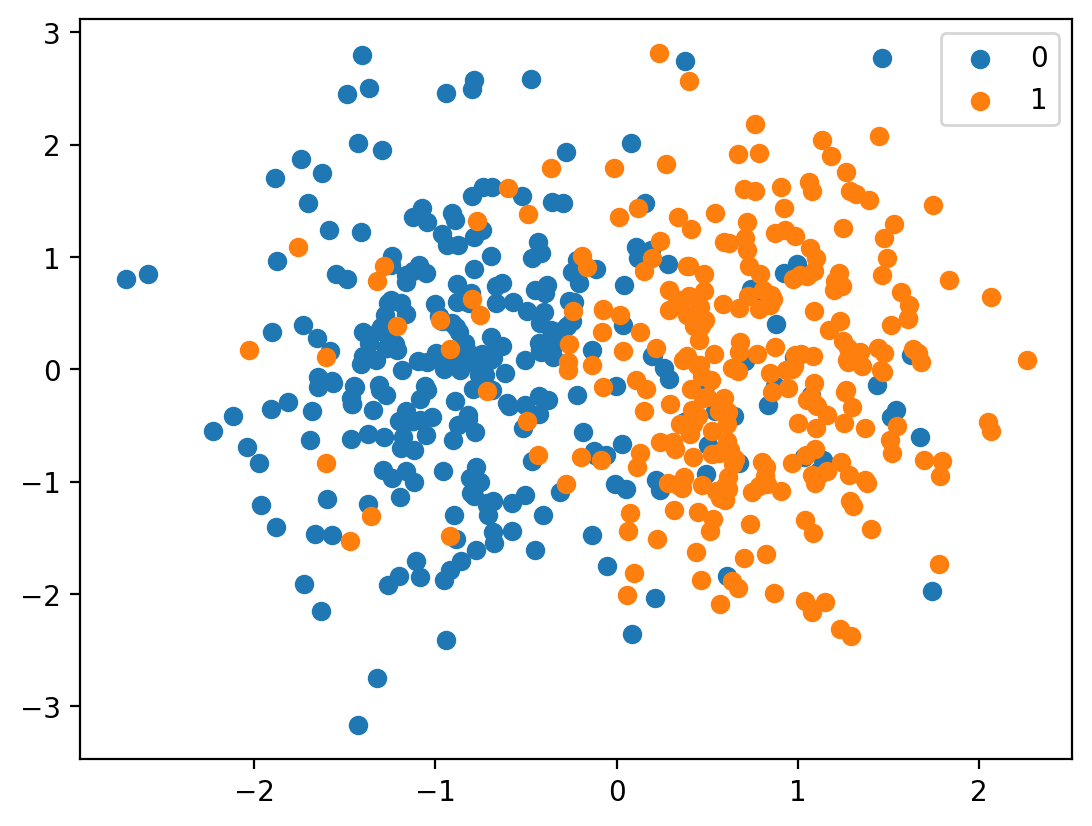

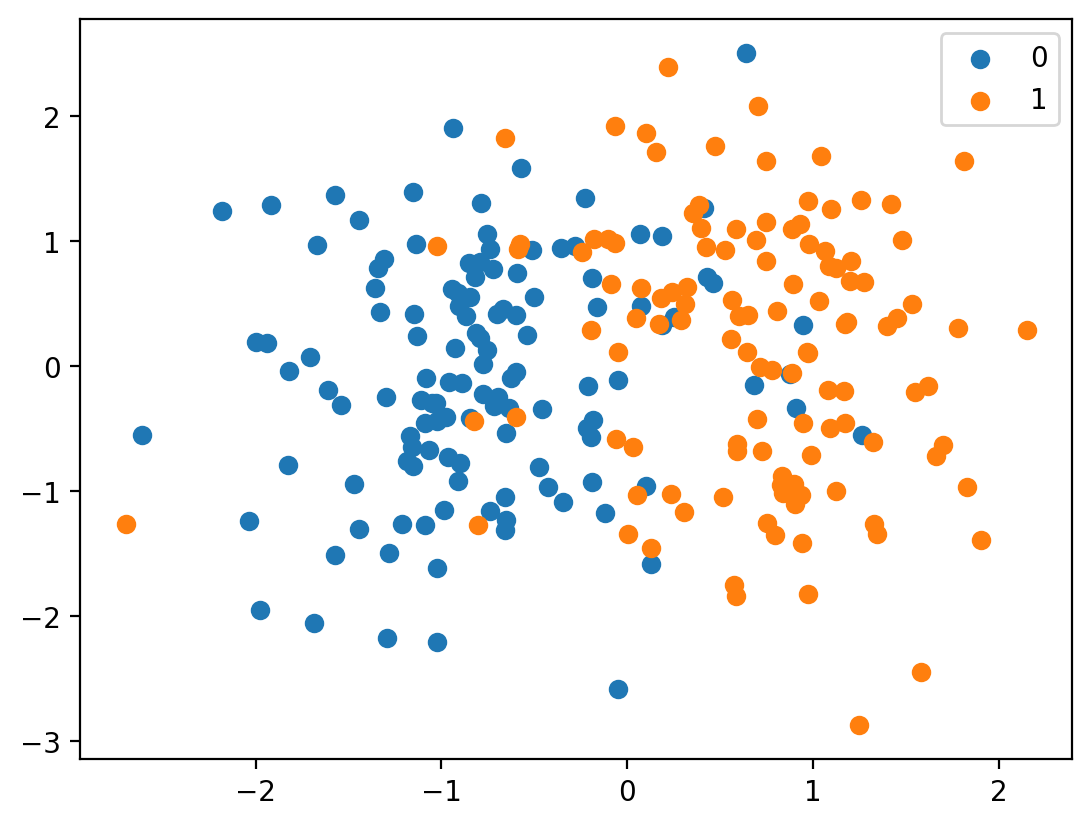

In [3]:
plot_data(x_train, y_train)
plot_data(x_val, y_val)

# Logistic regression
You'll complete the missing parts in the eight functions in the `LogisticRegressionTrainer` class below. Note that you are not supposed to return anything in `gradient_descent_step()` but update the parameters. Especially, do not forget to add the regularization term in `cross_entropy_loss()`.

In [12]:
class LogisticRegressionTrainer:
    def __init__(
        self,
        num_features: int,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        lambd: float = 0.0,
    ) -> None:
        """Initialize a logistic regression trainer."""
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Initialize weights for your model. You can use any initialization methods.
        # ========== YOUR CODE STARTS HERE ==========
        
        # scale = 1 / np.sqrt(num_features)
        self.theta = np.random.standard_normal(num_features + 1)

        # print('original theta',self.theta)
        # ========== YOUR CODE ENDS HERE ==========

    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Perform a single step of gradient update.

        Args:
            x: A matrix of features.
            y: A vector of labels.
        """
        # ========== YOUR CODE STARTS HERE ==========
        
        
        # Calculate predictions with current theta
        # print('x',x, x.shape)
        # print('theta', self.theta.shape)
        # print('theta transposed',self.theta.T, self.theta.T.shape)
    
        
        z = np.dot(x, self.theta)
        y_pred = self.sigmoid(z)
        
        # Compute gradients
        m = len(y)
        theta_grad = 1/m * np.dot(x.T, y_pred - y)
        
        # Regularization term
        regularization = (self.lambd/m) * self.theta 
    
        # Update theta parameters
        self.theta = self.theta - self.learning_rate * (theta_grad + regularization)
        
        # ========== YOUR CODE ENDS HERE ==========


    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Convert raw model output (logits) to probabilities.

        Args:
            z: Raw model output (logits).

        Returns:
            A vector (or float, if your input is a scalar) of probabilties.
        """
        # ========== YOUR CODE STARTS HERE ==========
        if z.ndim > 1:
        # Apply sigmoid element-wise if the input is a matrix
            return 1 / (1 + np.exp(-z))
        else:
            # Apply sigmoid directly if the input is a vector or scalar
            return 1 / (1 + np.exp(-z))
        # ========== YOUR CODE ENDS HERE ==========

    def cross_entropy_loss(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculates the binary cross-entropy loss given predictions and targets.
        The loss function should add the regularization term.

        Args:
            pred: Predicted labels (probabilities).
            target: Ground-truth labels.

        Returns:
            A scalar of loss.
        """
        
        assert pred.shape == target.shape
        # ========== YOUR CODE STARTS HERE ==========
        
        m = len(target)  # Number of examples
    
        # Binary cross-entropy loss
        loss = -(1 / m) * np.sum(target * np.log(pred) + (1 - target) * np.log(1 - pred))
    
        # Regularization term (L2 regularization)
        regularization_term = (self.lambd / (2 * m)) * np.sum(self.theta[1:]**2)
    
        # Total loss with regularization
        total_loss = loss + regularization_term
    
        return total_loss
        
        # ========== YOUR CODE ENDS HERE ==========

    def cross_entropy_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate the derivative of the loss function w.r.t. theta. The derivative of the
        loss function should also add the derivative of the L2 regularization term.

        Args:
            x: Feature vectors.
            y: Ground-truth labels.

        Returns:
            A vector with the same dimension as theta, where each element is the
            partial derivative of the loss function w.r.t. the corresponding element
            in theta.
        """
        # ========== YOUR CODE STARTS HERE ==========
        
        m = len(y)  # Number of examples
    
        # Calculate the predicted probabilities using the current weights
        y_pred = self.sigmoid(np.dot(x, self.theta))
    
        # Compute the gradient of the cross-entropy loss with respect to the weights
        loss_derivative = np.dot(x.T, (y_pred - y)) / m
    
        # L2 regularization term derivative
        regularization_derivative = (self.lambd / m) * np.concatenate(([0], self.theta[1:]))
    
        # Total derivative with regularization
        total_derivative = loss_derivative + regularization_derivative
    
        return total_derivative.flatten()
        
        # ========== YOUR CODE ENDS HERE ==========

    def accuracy(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculates the percentage of matched labels given predictions and targets.

        Args:
            pred: Predicted labels (rounded probabilities).
            target: Ground-truth labels.

        Return:
            The accuracy score (a float) given the predicted labels and the true labels.
        """
        assert pred.shape == target.shape
        
        # ========== YOUR CODE STARTS HERE ==========
        
        m = len(target)  # Number of examples
    
        # Calculate the number of correctly predicted labels
        correct_predictions = np.sum(pred == target)
    
        # Calculate accuracy
        accuracy_score = correct_predictions / m
    
        return accuracy_score
        
        # ========== YOUR CODE ENDS HERE ==========

    def train(
        self,
        x_train: np.ndarray,
        y_train: np.ndarray,
        x_val: np.ndarray,
        y_val: np.ndarray,
    ) -> None:
        """
        Run gradient descent for n epochs, where n = self.num_epochs. In every epoch,
            1. Update theta.
            2. Calculate the training loss & accuracy given the current theta, and append 
               then to self.train_loss_history and self.train_acc_history.
            3. Calculate the validation loss & accuracy given the current theta, and 
               append then to self.train_loss_history and self.train_acc_history.

        If you wish to use the bias trick, please remember to use it before the for loop.

        Args:
            x_train: Feature vectors for training.
            y_train: Ground-truth labels for training.
            x_val: Feature vectors for validation.
            y_val: Ground-truth labels for validation.
        """
        # ========== YOUR CODE STARTS HERE ==========
        
        # # Apply the bias trick once before the training loop
        print('x_train', x_train, x_train.shape)
        print('self.theta', self.theta, self.theta.shape)
        x_train_bias = np.c_[np.ones(len(y_train)), x_train]
        print('x_train_bias', x_train_bias, x_train_bias.shape)
        x_val_bias = np.c_[np.ones(len(y_val)), x_val]
        
    
        for epoch in range(self.num_epochs):
            # Perform a single step of gradient descent
            self.gradient_descent_step(x_train_bias, y_train)
    
            # Calculate training loss and accuracy
            logits = np.dot(x_train_bias, self.theta)
            train_pred = self.sigmoid(logits)
            print('train_pred',train_pred, 'shape', train_pred.shape)
            print('y_train',y_train.shape)
            # train_pred = train_pred.flatten()
            print('train_pred flattened', train_pred, train_pred.shape)
            train_loss = self.cross_entropy_loss(train_pred, y_train)
            train_acc = self.accuracy(np.round(train_pred), y_train)
            self.train_loss_history.append(train_loss)
            self.train_acc_history.append(train_acc)
    
            # Calculate validation loss and accuracy
            validation_logits = np.dot(x_val_bias, self.theta)
            val_pred = self.sigmoid(validation_logits)
            val_loss = self.cross_entropy_loss(val_pred, y_val)
            val_acc = self.accuracy(np.round(val_pred), y_val)
            self.val_loss_history.append(val_loss)
            self.val_acc_history.append(val_acc)
    
            # Print progress
            if epoch % 10 == 0:
                print(f"Epoch {epoch}/{self.num_epochs} - "
                      f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
        # Save the final test loss and accuracy (if needed)
        # test_pred = self.sigmoid(np.dot(x_test, self.theta))
        # self.test_loss = self.cross_entropy_loss(test_pred, y_test)
        # self.test_acc = self.accuracy(np.round(test_pred), y_test)
        # print(f"Final Test Loss: {self.test_loss:.4f}, Test Acc: {self.test_acc:.4f}")
        
        # ========== YOUR CODE ENDS HERE ==========

    def evaluate(self, x_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Evaluate the model on test set and store the test loss int self.test_loss and 
        test accuracy in self.test_acc. In other words, you should get the test loss and accraucy here.

        If you used the bias trick in train(), you have to also use it here.

        Args:
            x_test: Feature vectors for testing.
            y_test: Ground-truth labels for testing.
        """
        # ========== YOUR CODE STARTS HERE ==========
        
        m_test = len(y_test)  # Number of test examples
    
        # Use the bias trick (adding a column of ones to the feature matrix)
        x_test = np.c_[np.ones(m_test), x_test]
    
        # Calculate the predicted probabilities using the learned weights
        test_pred = self.sigmoid(np.dot(x_test, self.theta))
    
        # Calculate the test loss and accuracy
        self.test_loss = self.cross_entropy_loss(test_pred, y_test)
        self.test_acc = self.accuracy(np.round(test_pred), y_test)
    
        print(f"Test Loss: {self.test_loss:.4f}, Test Acc: {self.test_acc:.4f}")
        
        # ========== YOUR CODE ENDS HERE ==========

## Train a logistic regression classifier

x_train [[-0.49241619  0.51866574]
 [-0.00184049 -0.1453823 ]
 [-0.2212926   0.97200551]
 ...
 [-0.46719677 -0.81571516]
 [-1.04654233  1.31221814]
 [-0.80188833  0.67831769]] (560, 2)
self.theta [-0.25575024  1.20454474 -0.96847155] (3,)
x_train_bias [[ 1.         -0.49241619  0.51866574]
 [ 1.         -0.00184049 -0.1453823 ]
 [ 1.         -0.2212926   0.97200551]
 ...
 [ 1.         -0.46719677 -0.81571516]
 [ 1.         -1.04654233  1.31221814]
 [ 1.         -0.80188833  0.67831769]] (560, 3)
train_pred [0.20579244 0.47077196 0.18818647 0.76697229 0.90831243 0.76643518
 0.87679635 0.14454574 0.12447904 0.74957697 0.75068031 0.63495515
 0.21547128 0.91342618 0.23948013 0.10626624 0.81864454 0.59909671
 0.82367202 0.08229053 0.47036408 0.63772952 0.78736375 0.60421957
 0.07885431 0.87918269 0.01528794 0.45611609 0.69705597 0.33189854
 0.07803562 0.45145149 0.49241274 0.3934507  0.74348567 0.82917771
 0.29490952 0.59822893 0.34609824 0.23724032 0.07034546 0.58881093
 0.07440145 0.21249

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



train_pred [0.23570223 0.47849444 0.26268524 0.8386973  0.89170063 0.88921915
 0.87829235 0.10234246 0.11045019 0.83192244 0.73562345 0.75795071
 0.19300338 0.91696728 0.29214475 0.09127182 0.87852235 0.60885421
 0.85434301 0.04553806 0.62816179 0.69537526 0.75086404 0.54016938
 0.09090918 0.90856065 0.02265346 0.51223565 0.62360881 0.40011884
 0.08802599 0.45346216 0.73829201 0.49975175 0.77607134 0.8954733
 0.51666776 0.79418387 0.22326052 0.60763436 0.09516334 0.38457719
 0.06019738 0.1664601  0.31050523 0.07054668 0.04204751 0.82365712
 0.26654226 0.62763592 0.6991548  0.13516853 0.94138734 0.41058821
 0.85060853 0.20127813 0.74610548 0.03077714 0.65561423 0.94949572
 0.09582761 0.84348678 0.20111605 0.72197484 0.39625514 0.72876746
 0.68893927 0.87207854 0.29871947 0.2070073  0.56350905 0.24191487
 0.3086023  0.74894871 0.57556668 0.77006624 0.93580691 0.93142199
 0.81752412 0.18641677 0.82435329 0.68662303 0.5763156  0.39971527
 0.14938927 0.70926903 0.91680481 0.76797741 0.33320

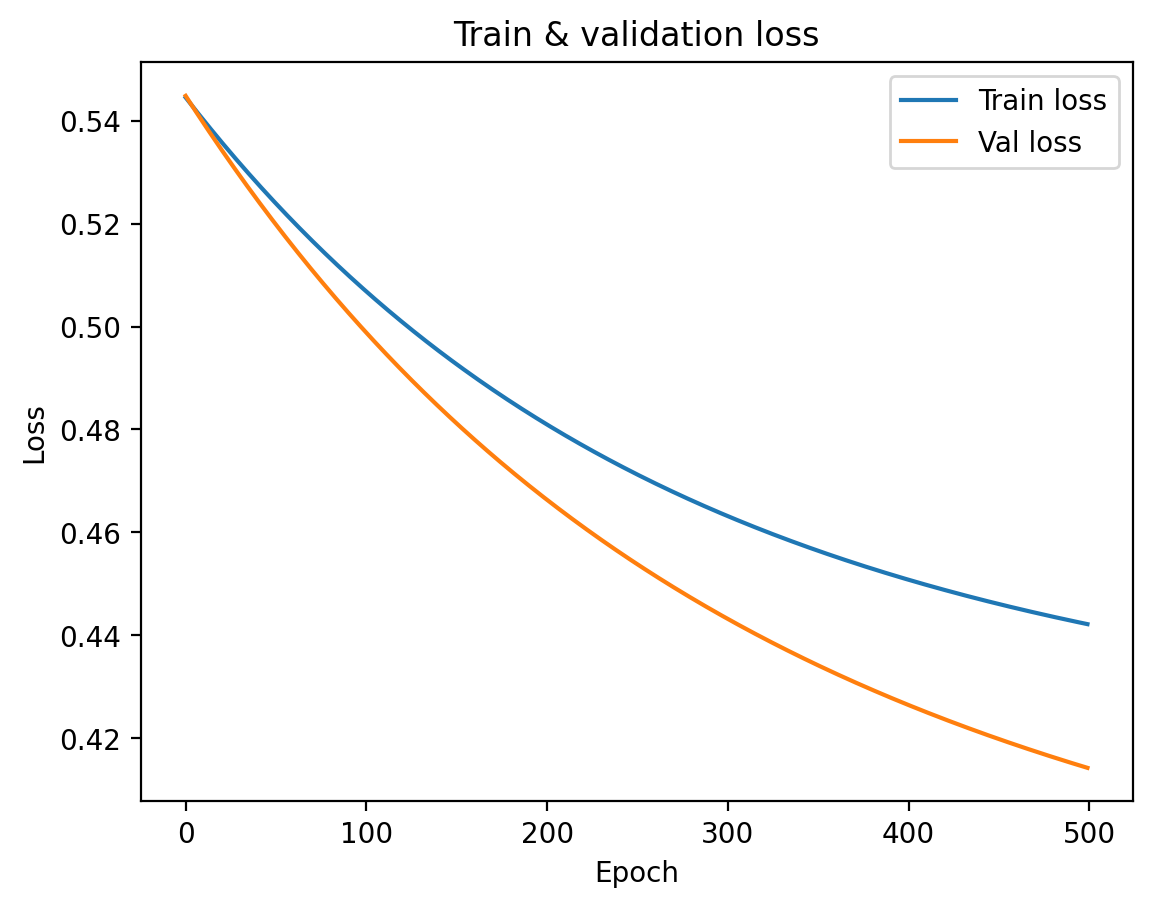

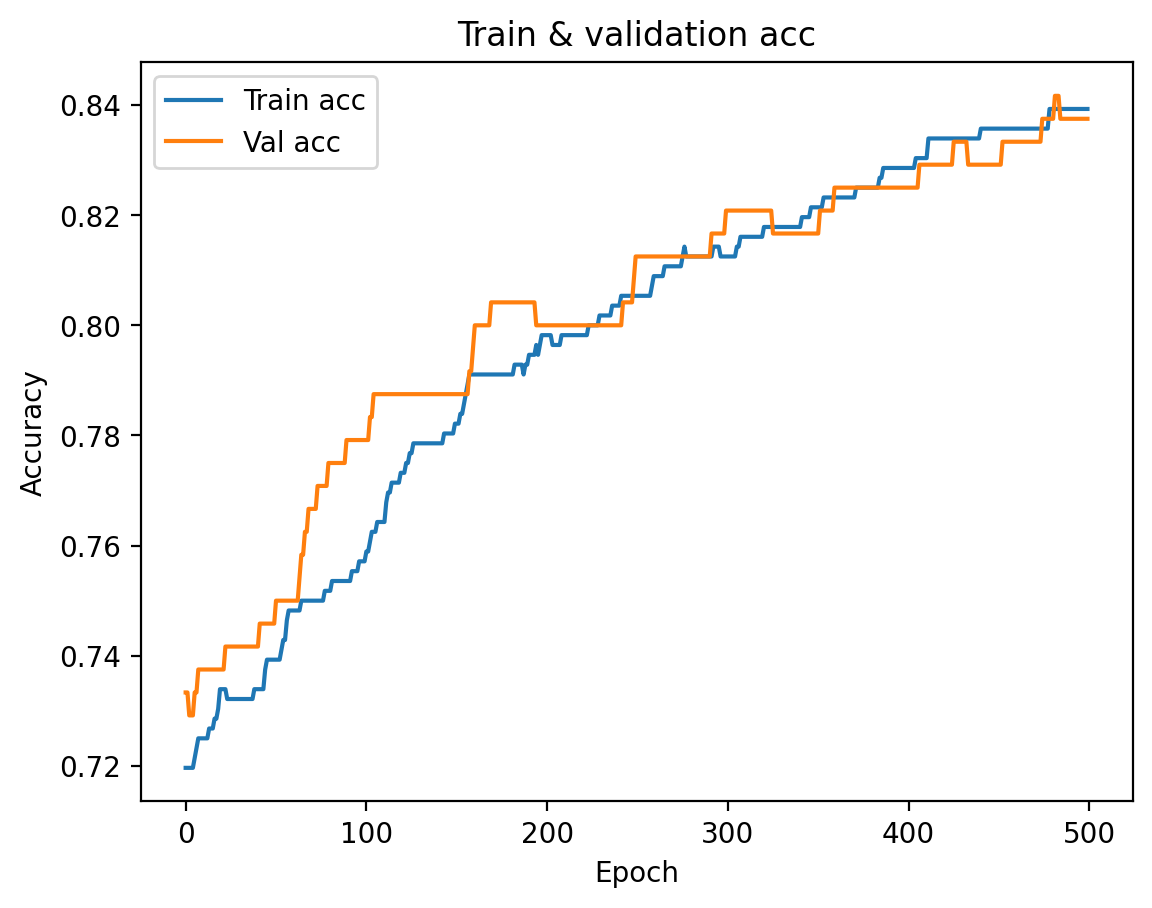

In [13]:
# Train a logistic regression classifier
# ========== YOUR CODE STARTS HERE ==========

trainer = LogisticRegressionTrainer(num_features=2)

# Train the logistic regression classifier
trainer.train(x_train, y_train, x_val, y_val)

# ========== YOUR CODE ENDS HERE ==========

print(f"Final train loss: {trainer.train_loss_history[-1]}")
print(f"Final validation loss: {trainer.val_loss_history[-1]}")
print(f"Final train acc: {trainer.train_acc_history[-1]}")
print(f"Final validation acc: {trainer.val_acc_history[-1]}")

plt.plot(np.arange(trainer.num_epochs), trainer.train_loss_history, label="Train loss")
plt.plot(np.arange(trainer.num_epochs), trainer.val_loss_history, label="Val loss")
plt.title("Train & validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(np.arange(trainer.num_epochs), trainer.train_acc_history, label="Train acc")
plt.plot(np.arange(trainer.num_epochs), trainer.val_acc_history, label="Val acc")
plt.title("Train & validation acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Plotting decision boundaries

My logistic regression weights: [-0.12728693  1.5727216  -0.39512273]


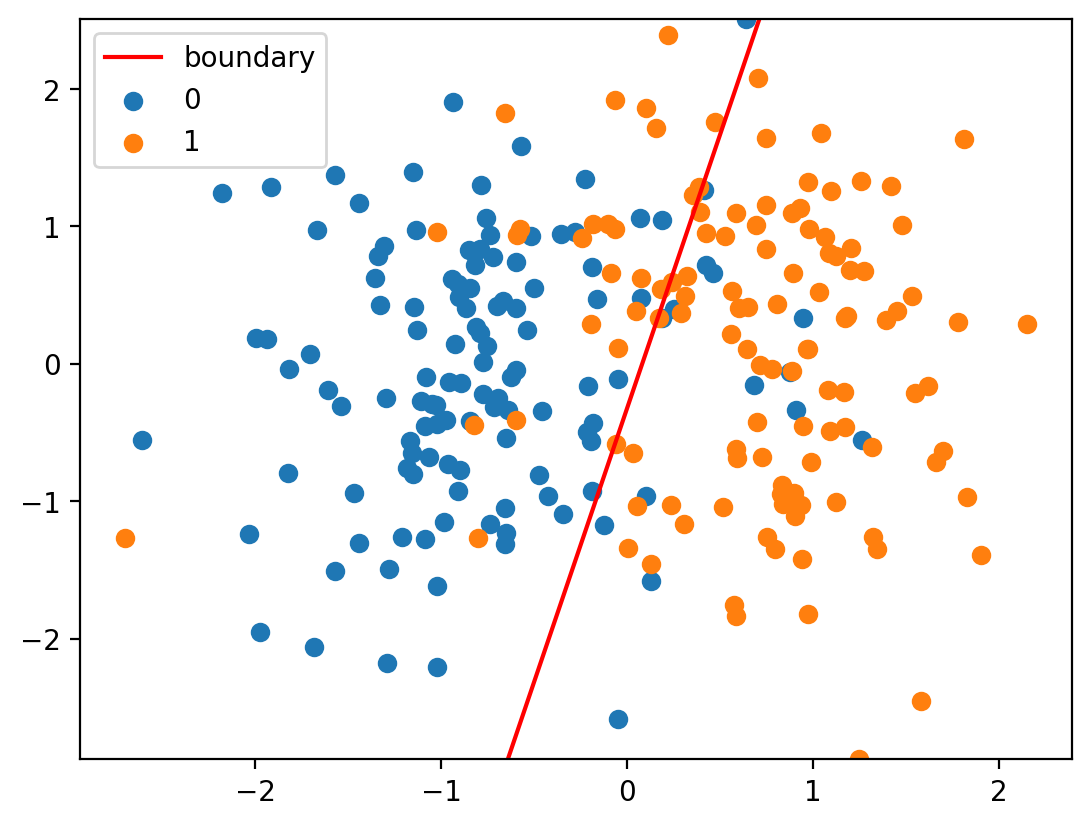

Sklearn logisitic regression weights: [-0.03824582  2.02104408  0.03841819]


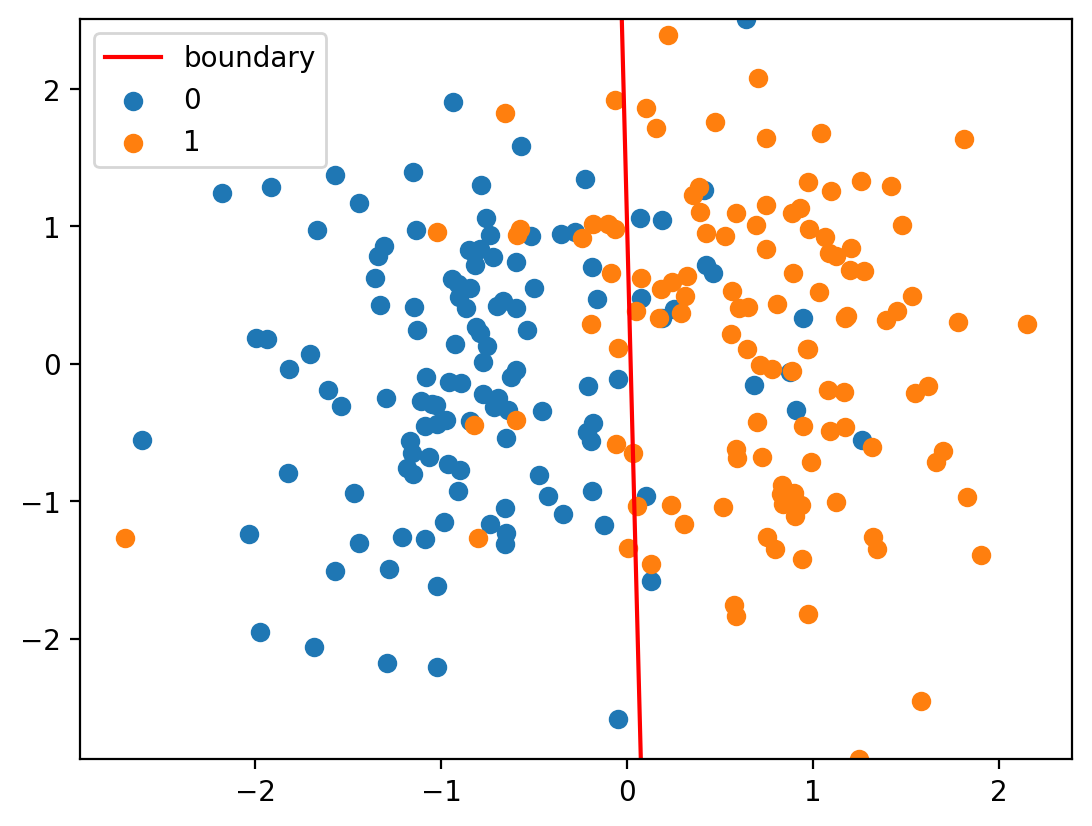

In [14]:
# 0 = theta0 + theta1 * x + theta2 * y
# y = (-theta0 - theta1 * x) / theta2
print(f"My logistic regression weights: {trainer.theta}")
plot_decision_boundary(trainer.theta, x_val)
plot_data(x_val, y_val)

model = LogisticRegression(penalty="l2", n_jobs=-1).fit(x_train, y_train)
print(f"Sklearn logisitic regression weights: {np.append(model.intercept_, model.coef_)}")
plot_decision_boundary(np.append(model.intercept_, model.coef_), x_val)
plot_data(x_val, y_val)

# Evaluation

In [16]:
# Evaluate your model on the test set
# ========== YOUR CODE STARTS HERE ==========

# eval = LogisticRegressionTrainer.evaluate(x_test, y_test)

trainer.evaluate(x_test, y_test)

# ========== YOUR CODE ENDS HERE ==========
print(f"Test loss: {trainer.test_loss}")
print(f"Test acc: {trainer.test_acc}")

Test Loss: 0.4016, Test Acc: 0.8500
Test loss: 0.4015517376501569
Test acc: 0.85
